[**KRITIK AGARWAL 19BBTCS067**](https://github.com/Kritik007)

***DAP Lab Exp.No.8***

US Baby Names 1880–2021: 

The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 to 2021

1. Use Data Wrangling to load this dataset
2. Find sum of the birth’s column by sex as the total number of births in that year 
3. Assemble all of the data into a single Data Frame and further add a year field 
4. Visualize total births by sex and year 
5. Analyze Naming Trends



In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
!head -n 10 /content/drive/MyDrive/names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [3]:
import pandas as pd

In [4]:
names1880 = pd.read_csv('/content/drive/MyDrive/names/yob1880.txt', names=['name', 'sex', 'births'])

In [5]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [6]:
names1880.groupby('sex').births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

Since the dataset is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field. We can do this using pandas.concat:


In [7]:
years = range(1880, 2022)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
  path = '/content/drive/MyDrive/names/yob%d.txt' % year
  frame = pd.read_csv(path, names=columns)
  frame['year'] = year
  pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


In [9]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [10]:
total_births.tail()

sex,F,M
year,,
2017,1723043,1847191
2018,1696917,1811738
2019,1673030,1788414
2020,1609171,1718248
2021,1627098,1734277


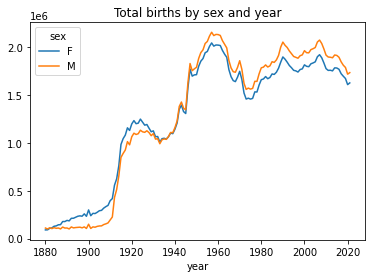

In [11]:
total_births.plot(title='Total births by sex and year')

Now, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex, then add the new column to each group:

In [12]:
def add_prop(group):
  group['prop'] = group.births / group.births.sum()
  return group
  
names = names.groupby(['year', 'sex']).apply(add_prop)

In [13]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2052776,Zyeire,M,5,2021,0.000003
2052777,Zyel,M,5,2021,0.000003
2052778,Zyian,M,5,2021,0.000003
2052779,Zylar,M,5,2021,0.000003


In [14]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2019  M      1.0
2020  F      1.0
      M      1.0
2021  F      1.0
      M      1.0
Name: prop, Length: 284, dtype: float64

Now that this is done, We are going to extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another group operation:

In [15]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [16]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
283871,Zev,M,218,2021,0.000126
283872,Harris,M,217,2021,0.000125
283873,Ronnie,M,217,2021,0.000125
283874,Merrick,M,217,2021,0.000125


Analyzing Naming Trends

In [17]:
boys = top1000[top1000.sex == 'M']

In [18]:
girls = top1000[top1000.sex == 'F']

In [19]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [20]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 1880 to 2021
Columns: 7276 entries, Aaden to Zyon
dtypes: float64(7276)
memory usage: 7.9 MB


In [21]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc920e95b50>,
      dtype=object)

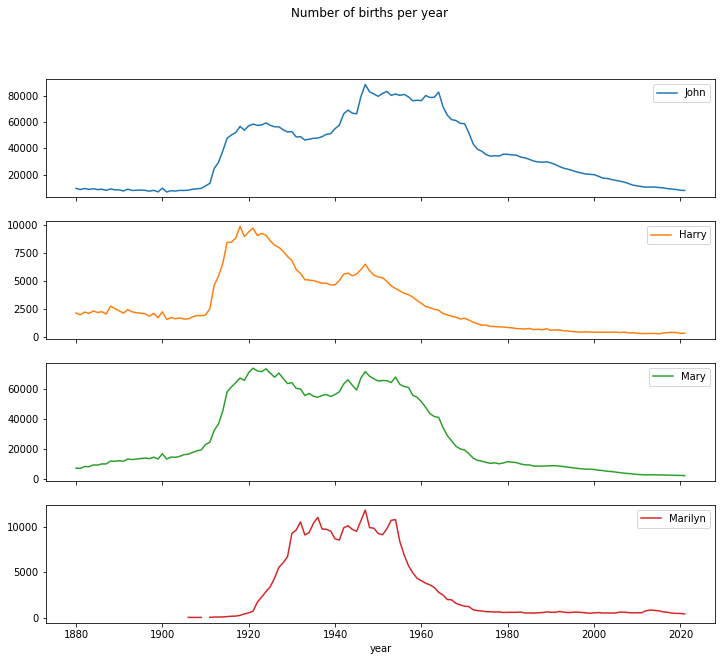

In [22]:
subset.plot(subplots=True, figsize=(12, 10), grid=False, title="Number of births per year")

In [23]:
all_names = pd.Series(top1000.name.unique())

In [24]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [25]:
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [26]:
filtered = top1000[top1000.name.isin(lesley_like)]

In [27]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    379721
Lesly      11433
Name: births, dtype: int64

In [28]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [29]:
table = table.div(table.sum(1), axis=0)

In [30]:
table.tail()

sex,F,M
year,,
2017,1.0,NaN
2018,1.0,NaN
2019,1.0,NaN
2020,1.0,NaN
2021,1.0,NaN


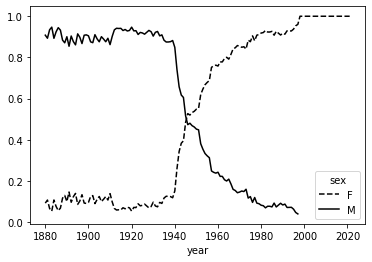

In [31]:
table.plot(style={'M': 'k-', 'F': 'k--'})